# **Part 1: Import Libraries and Load Dataset**

In [1]:
# -----------------------------------------------
# PART 1: Import necessary libraries and load data
# -----------------------------------------------

# Data handling
import pandas as pd
import numpy as np

# Text processing
import re
import string

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Yelp dataset directly from the GitHub URL
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv"
data = pd.read_csv(url)

# Display first 5 rows to understand the structure
data.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# **Part 2: Data Cleaning and Sentiment Labeling**

In [2]:
# -----------------------------------------------
# PART 2: Data Cleaning and Sentiment Labeling
# -----------------------------------------------

# We'll only use reviews with 1 star (negative) and 5 stars (positive)
data = data[data['stars'].isin([1, 5])]

# Create a new column for sentiment: 0 for negative (1 star), 1 for positive (5 stars)
data['sentiment'] = data['stars'].apply(lambda x: 1 if x == 5 else 0)

# Function to clean review text
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove content in brackets
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', '', text)  # remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # remove words containing numbers
    return text

# Apply cleaning function to all reviews
data['clean_review'] = data['text'].apply(clean_text)

# Check the cleaned data
data[['text', 'clean_review', 'sentiment']].head()


/tmp/ipython-input-2-1283705047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['stars'].apply(lambda x: 1 if x == 5 else 0)


,text,clean_review,sentiment
0,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,i have no idea why some people give bad review...,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park its...,1
4,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg no...,1
6,Drop what you're doing and drive here. After I...,drop what youre doing and drive here after i a...,1


# **Part 3: Split the Data into Train and Test Sets**

In [3]:
# -----------------------------------------------
# PART 3: Split the dataset into train and test sets
# -----------------------------------------------

# Define features and labels
X = data['clean_review']
y = data['sentiment']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm sizes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 3268
Testing samples: 818


# **Part 4: TF-IDF Vectorization**

In [4]:
# -----------------------------------------------
# PART 4: Convert text into numerical features using TF-IDF
# -----------------------------------------------

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit on training data and transform both training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check shape of transformed data
print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)


TF-IDF shape (train): (3268, 21072)
TF-IDF shape (test): (818, 21072)


# **Part 5: Train the Logistic Regression Model**

In [5]:
# -----------------------------------------------
# PART 5: Train the Logistic Regression model
# -----------------------------------------------

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)


# **Part 6: Evaluate the Model Performance**

Model Accuracy: 0.871638141809291

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.33      0.48       150
           1       0.87      0.99      0.93       668

    accuracy                           0.87       818
   macro avg       0.90      0.66      0.70       818
weighted avg       0.88      0.87      0.85       818



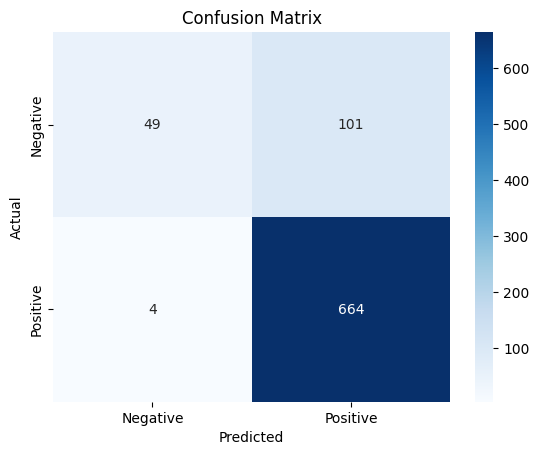

In [6]:
# -----------------------------------------------
# PART 6: Evaluate model accuracy and performance
# -----------------------------------------------

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
